In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from scipy.stats import rankdata
from scipy.stats import pearsonr

In [9]:
my_path = '/mnt/c/Users/donna/Downloads/Thesis/rankjes/ranks_per_feature/cov_spread_rank_results.csv'
paper_path = '/mnt/c/Users/donna/Downloads/Thesis/rankjes/paper_ranks/03x_matched_reference_ranks.csv'

In [10]:
my_df = pd.read_csv(my_path)
paper_df = pd.read_csv(paper_path)

In [11]:
paper_df['tissue'] = paper_df['tissue'].str.lower()
paper_df['cell_type'] = paper_df['cell_type'].apply(lambda x: '_'.join(x.rsplit('_', 1)[:-1] + [x.rsplit('_', 1)[-1].lower()]) if '_' in x else x.lower())

In [12]:
my_median = my_df.groupby('cell_type')['rank'].median().reset_index().rename(columns={'rank': 'median_rank_my'})
paper_median = paper_df.groupby('cell_type')['rank'].median().reset_index().rename(columns={'rank': 'median_rank_paper'})

In [13]:
merged_df = pd.merge(my_median, paper_median, on='cell_type')
merged_df['tissue'] = merged_df['cell_type'].apply(lambda x: x.split('_')[-1])

In [14]:
# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(merged_df['median_rank_my'], merged_df['median_rank_paper'])
corr_text = f'Pearson r = {corr_coef:.2f}, p = {p_value:.1e}'

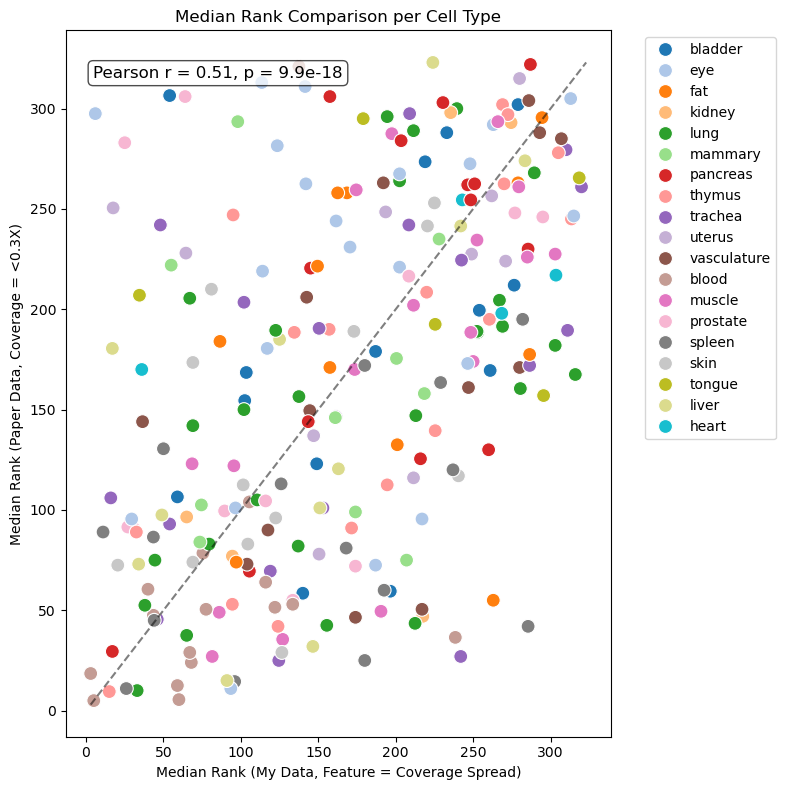

In [15]:
plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=merged_df,
    x='median_rank_my',
    y='median_rank_paper',
    hue='tissue', 
    palette='tab20',  
    s=100 
)

# Add diagonal reference line
min_val = min(merged_df['median_rank_my'].min(), merged_df['median_rank_paper'].min())
max_val = max(merged_df['median_rank_my'].max(), merged_df['median_rank_paper'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)

# Annotate correlation coefficient
plt.text(0.05, 0.95, corr_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
         
plt.xlabel('Median Rank (My Data, Feature = Coverage Spread)')
plt.ylabel('Median Rank (Paper Data, Coverage = <0.3X)')
plt.title('Median Rank Comparison per Cell Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()
plt.show()